# Stanford CS25 In-Depth Review: Transformers in Biomedicine
### A Tale of Two Models: Generalist Giants vs. Specialist Experts

Welcome to this comprehensive guide to the Stanford CS25 lecture on Biomedical Transformers. This notebook is designed to be a self-contained, in-depth learning resource. We will not only cover the key points from the lecture but also dive deep into the pivotal research paper, **"Do We Still Need Clinical Language Models?"**, to build a solid, expert-level intuition.

Forget watching the hour-long video. By the end of this notebook, you will have a robust understanding of the central debate in medical AI:

1.  **The Generalist Approach (e.g., Med-PaLM):** Can we take a massive Large Language Model (LLM), trained on the vast expanse of the internet, and refine it into a world-class medical expert?
2.  **The Specialist Approach (e.g., Clinical-T5):** Is it more effective and efficient to build smaller, specialized models trained from the ground up on the messy, jargon-filled, and unique language of clinical data?

Our journey will be filled with clear explanations, relatable analogies, and insightful visualizations to make these complex topics stick. Let's begin.

## Chapter 1: Why Transformers are a Perfect Match for Biomedicine

The lecture begins by establishing a fundamental truth: **biomedical data is overwhelmingly sequential.**

-   **Electronic Health Records (EHR):** A patient's life story told through a sequence of visits, diagnoses, lab results, and treatments.
-   **Proteins:** A chain-like sequence of amino acids that fold into complex 3D structures to perform bodily functions.
-   **Genomes:** An incredibly long sequence of four nucleotide bases (A, C, G, T) that contains the blueprint for an entire organism.

Transformers are the reigning champions of sequence modeling. Let's understand why with a powerful analogy.

### The Genius Detective: An Analogy for Transformers

Imagine a genius detective reading a complex novel to solve a mystery. Unlike an ordinary reader who might forget early details, this detective has a special ability: **self-attention**.

> **What is Self-Attention?** For every word the detective reads, they can instantly look back at *all* other words in the book and decide which ones are most important for understanding the current word. When they read the word "suspect" in the final chapter, their attention might instantly snap to a seemingly insignificant clue mentioned in Chapter 1 and a motive hinted at in Chapter 5. This ability to weigh the importance of all other words to understand the context of one word is the magic of self-attention.

This makes transformers uniquely suited for biomedicine:

| Feature | Why it Matters in Biomedicine | The Genius Detective Analogy |
| :--- | :--- | :--- |
| **Modeling Long-Range Dependencies** | A patient's childhood asthma (Chapter 1) is critically important for diagnosing their adult-onset shortness of breath (Chapter 20). A standard model might forget this early detail, but a Transformer's self-attention connects them effortlessly. | The detective connects the muddy boots from the first page to the final reveal, no matter how far apart they are. |
| **Handling Multimodality** | An EHR contains text notes, structured lab values (e.g., `blood_pressure: 140/90`), and even image data. Transformers can process all these different "languages" in a unified way. | The detective can simultaneously analyze handwritten letters, financial records, and security camera footage, seeing how they all relate. |
| **Scalability & Parallelization** | The human genome has over 3 billion base pairs. Training a model on this requires incredible efficiency. Transformers are designed to be trained in parallel on modern GPUs/TPUs. | Instead of one detective, imagine an entire agency of detectives working in perfect sync, dividing up the clues and sharing insights instantly to solve the case faster. |

---
## Chapter 2: The Generalists - The Story of Med-PaLM

The first major part of the lecture focuses on the paper **"Large Language Models Encode Clinical Knowledge,"** which details the creation of **Med-PaLM**. This is the ultimate "generalist" success story.

### The Problem: Medical AI Lacked a Good Final Exam

Before this work, evaluating medical AI was fragmented. To solve this, the researchers built two crucial components:

1.  **MultiMedQA Benchmark:** A comprehensive "final exam" for medical AI, combining seven datasets. It includes everything from professional US Medical Licensing Exam (USMLE) questions to casual health queries you might Google.
2.  **A Rigorous Human Evaluation Framework:** Going beyond simple right/wrong scores, they had **expert clinicians** rate answers on factuality, reasoning, and potential for harm. They also had **lay users** rate them on helpfulness and clarity. This dual-perspective is critical because an answer can be technically correct but completely unhelpful or terrifying to a patient.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

# Data representing the conceptual composition of the MultiMedQA benchmark
categories = {
    'Professional Medicine': ['USMLE-Style (MedQA)', 'Indian Exams (MedMCQA)', 'Clinical Topics (MMLU)'],
    'Medical Research': ['PubMedQA'],
    'Consumer Health': ['Consumer Questions (LiveQA)', 'New Consumer Qs (HealthSearchQA)']
}

fig = go.Figure()

# Define colors for categories
colors = {'Professional Medicine': '#d62728', 'Medical Research': '#ff7f0e', 'Consumer Health': '#2ca02c'}

for category, datasets in categories.items():
    fig.add_trace(go.Bar(
        y=datasets,
        x=[1]*len(datasets), # Dummy values for length
        name=category,
        orientation='h',
        marker_color=colors[category]
    ))

fig.update_layout(
    title_text='<b>The MultiMedQA Benchmark: A Multi-Faceted Exam for Medical AI</b>',
    title_x=0.5,
    xaxis_title='Dataset Component',
    yaxis_title='Question Type',
    barmode='stack',
    height=500,
    width=800,
    legend_title_text='Question Category',
    template='plotly_white',
    yaxis={'categoryorder':'total ascending'}
)
fig.update_xaxes(showticklabels=False)

fig.show()

### From Raw Genius to Refined Expert: The Birth of Med-PaLM

The team started with **FLAN-PaLM**, a massive 540-billion parameter model. It was a genius, passing the USMLE benchmark. However, when asked to generate long-form answers to real-world questions, its flaws appeared.

#### An Illustrative Example: Before and After Tuning

**Question:** *"I'm a 45-year-old man, a bit overweight, and I've been feeling a sharp pain in my chest when I walk up stairs. I'm scared. What could it be?"*

**FLAN-PaLM (The Raw Genius):**
> "Chest pain can be caused by a myocardial infarction (heart attack), pericarditis, anxiety, or gastroesophageal reflux disease."

*Critique:* While technically correct, this answer is terrifying and unhelpful. It lists scary possibilities without providing context, reassurance, or a safe course of action. It's a data dump, not medical advice.

This is where **Instruction Prompt Tuning** came in. Instead of retraining the whole model, they froze its vast knowledge and taught it a small, new set of skills: how to be a doctor. They showed it a few hundred examples of high-quality answers written by clinicians.

**Med-PaLM (The Refined Expert):**
> "Thank you for reaching out. Experiencing chest pain, especially with exertion like walking upstairs, is something that should always be evaluated by a healthcare professional to rule out serious causes. While there are many possible reasons for chest pain, some, like angina (which is related to blood flow to the heart), are more serious than others. It is important that you make an appointment with your doctor to discuss these symptoms. They can perform a full evaluation. **If the pain becomes severe, spreads to your arm or jaw, or is accompanied by shortness of breath or sweating, you should seek emergency medical care immediately.** This information is for educational purposes and is not a substitute for professional medical advice."

*Critique:* This answer is a world apart. It is **safe** (advises seeing a doctor, gives emergency warnings), **contextual** (links the pain to exertion), **reassuring yet firm**, and **responsible** (includes a disclaimer). It learned not just the facts, but the *art* of medical communication.


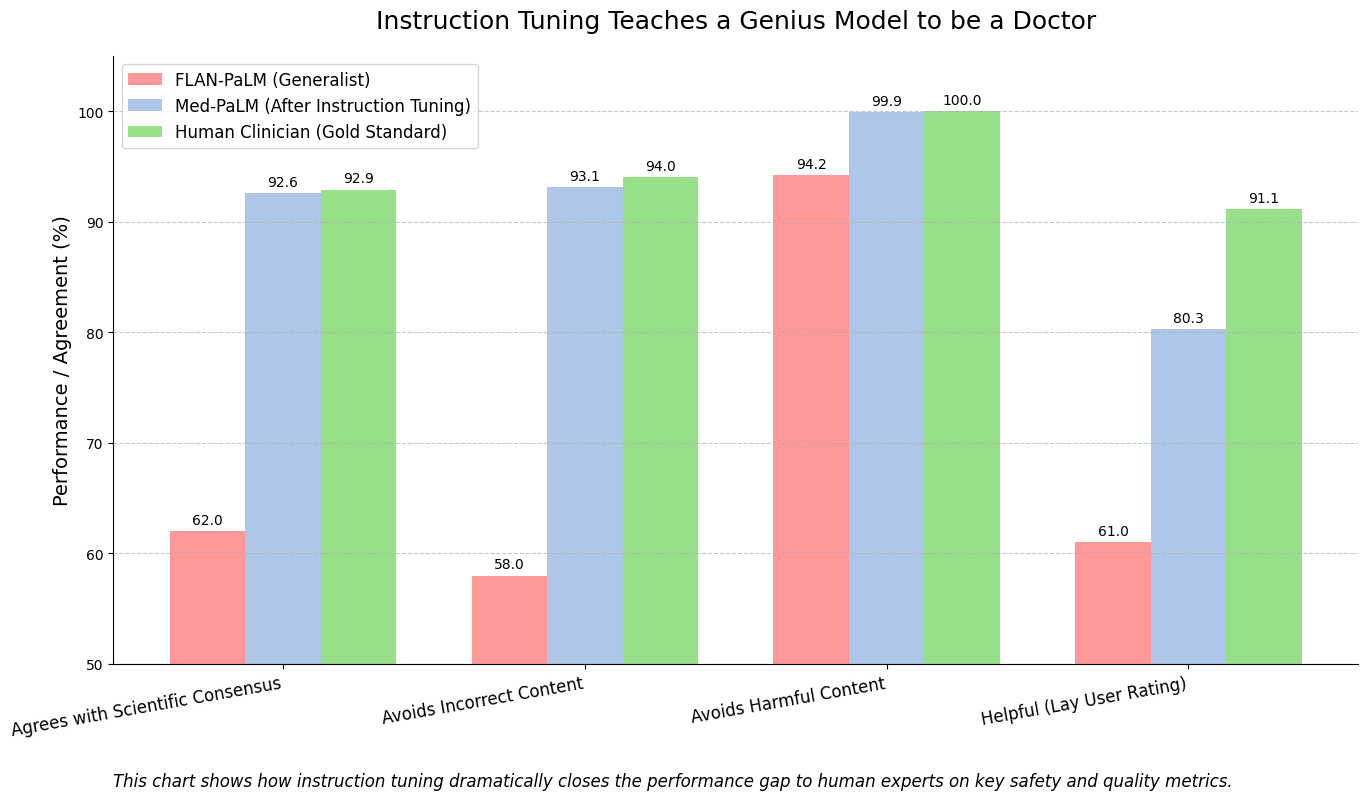

In [2]:
# This code simulates and visualizes the performance jump from FLAN-PaLM to Med-PaLM

labels = ['Agrees with Scientific Consensus', 'Avoids Incorrect Content',
          'Avoids Harmful Content', 'Helpful (Lay User Rating)']

# Simulated data based on trends described in the lecture
flan_palm_scores = np.array([62.0, 58.0, 94.2, 61.0])
med_palm_scores = np.array([92.6, 93.1, 99.9, 80.3])
clinician_scores = np.array([92.9, 94.0, 100.0, 91.1])

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 8))
# Using more distinct and professional colors
rects1 = ax.bar(x - width, flan_palm_scores, width, label='FLAN-PaLM (Generalist)', color='#ff9896')
rects2 = ax.bar(x, med_palm_scores, width, label='Med-PaLM (After Instruction Tuning)', color='#aec7e8')
rects3 = ax.bar(x + width, clinician_scores, width, label='Human Clinician (Gold Standard)', color='#98df8a')

ax.set_ylabel('Performance / Agreement (%)', fontsize=14)
ax.set_title('Instruction Tuning Teaches a Genius Model to be a Doctor', fontsize=18, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=10, ha='right', fontsize=12)
ax.set_ylim(50, 105)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.bar_label(rects1, padding=3, fmt='%.1f', fontsize=10)
ax.bar_label(rects2, padding=3, fmt='%.1f', fontsize=10)
ax.bar_label(rects3, padding=3, fmt='%.1f', fontsize=10)

plt.figtext(0.5, 0.01, 'This chart shows how instruction tuning dramatically closes the performance gap to human experts on key safety and quality metrics.',
            ha='center', fontsize=12, style='italic')

fig.tight_layout(rect=[0, 0.05, 1, 1]) # Adjust layout to make space for figtext
plt.show()

---
## Chapter 3: The Specialists - A Deep Dive into "Do We Still Need Clinical Language Models?"

Med-PaLM is impressive, but it's a behemoth. This leads to the central question of the research paper: can a smaller, more focused model, trained specifically on clinical data, be more effective and efficient?

### The "Domain Shift" Problem: Why Clinical Text is So Hard

Models trained on general text (like Wikipedia or news articles) are used to clean, grammatically correct language. Clinical text is a completely different beast.

**Example of Domain Shift:**

-   **General Text:** "The patient was diagnosed with diabetes mellitus and has a history of hypertension. They were prescribed 500mg of metformin to be taken twice daily."
-   **Clinical Note Text:** "s/p new dx DM2, hx HTN. Rx metformin 500mg PO BID. Pt denies c/o SOB, CP. F/u 1mo."

This clinical note is dense with abbreviations (`s/p`, `dx`, `hx`, `c/o`, `f/u`), contains non-standard grammar, and assumes a massive amount of implicit medical knowledge. A general model struggles to parse this, whereas a specialist model trained on millions of such notes learns this language fluently.

The paper compares four philosophies for training a model on this specialized text, which we can understand through an analogy of training an apprentice.

| Approach | Model Strategy | The Apprentice Analogy |
|:---|:---|:---|
| **1. Train from Scratch (Specialist)** | Train a model only on clinical text. | A **Native Speaker**. The apprentice grows up only speaking the clinical language. They are a pure, fluent expert. |
| **2. Domain-Adaptive Pretraining (DAPT)** | Take a generally-trained model and immerse it in clinical text before finetuning. | An **Immersive Learner**. The apprentice knows a general language, then spends years living abroad to learn the new clinical language and culture. |
| **3. Finetune General Model** | Directly teach a generally-trained model a specific, labeled clinical task. | A **Tourist with a Phrasebook**. The apprentice knows a general language and is given a few specific phrases to get by for one task (e.g., ordering food). |
| **4. In-Context Learning (ICL)** | Give a massive general model a few examples in the prompt and ask it to perform the task without any real learning. | A **Tourist Asking for Directions**. The apprentice points to a map and a few examples, hoping a local can figure out what they need on the spot. |


### Finding 1: Specialists are Radically More Parameter-Efficient

The paper's first bombshell finding (from its Table 2) is that **specialist models do more with less**. A smaller model trained on in-domain data can outperform a much larger generalist model.

**What this means:** A hospital with a limited budget and computing infrastructure can achieve state-of-the-art results without needing access to a massive, expensive supercomputer. This democratizes access to powerful AI.

In [5]:
import pandas as pd
import plotly.graph_objects as go

# Data from Table 2 of the paper
data = {
    'Model': ['T5-Base', 'Clinical-T5-Base', 'T5-Large', 'Clinical-T5-Large', 'T5-XL'],
    'Type': ['Generalist', 'Specialist', 'Generalist', 'Specialist', 'Generalist'],
    'Parameters (M)': [220, 220, 770, 770, 3000],
    'MedNLI Accuracy': [0.818, 0.855, 0.849, 0.872, 0.869]
}
df = pd.DataFrame(data)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=[df['Model'], df['Type']],
    y=df['MedNLI Accuracy'],
    text=[f'{acc:.3f}' for acc in df['MedNLI Accuracy']],
    textposition='auto',
    marker_color=np.where(df['Type'] == 'Specialist', '#d62728', '#1f77b4')
))

fig.update_layout(
    title='<b>Finding 1: Specialist Models Punch Above Their Weight</b><br><sup>(Analysis of Paper Table 2)</sup>',
    title_x=0.5,
    yaxis_title='MedNLI Accuracy',
    xaxis_title='Model',
    yaxis_range=[0.8, 0.88],
    height=600, width=900, template='plotly_white',
    legend=dict(title='Model Type', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

# Add annotation
fig.add_annotation(x=['T5-Large', 'Generalist'], y=0.852,
                   text="The 220M Specialist model<br>outperforms the 770M Generalist!",
                   showarrow=True, arrowhead=2, ax=-100, ay=-40)

fig.show()

### Finding 2: Not All FLOPs are Created Equal - In-Domain Data is Gold
The paper explores if raw computing power (measured in **FLOPs** - Floating Point Operations per Second) is the key to performance. The answer is no. The *quality* of the data matters more.

> **An Intuitive Analogy:** Imagine you want to learn to be a world-class chef. You can either spend 10,000 hours reading every book ever written (high FLOPs, general data) or spend 1,000 hours actually cooking in a Michelin-star kitchen (lower FLOPs, high-quality specialist data). The second approach will make you a better chef, faster.

Training on clinical text is more valuable for clinical tasks because it has a much higher **signal-to-noise ratio**. Every token is rich with relevant information. This means clinical models are more **computationally efficient**—they achieve better performance with less training compute.

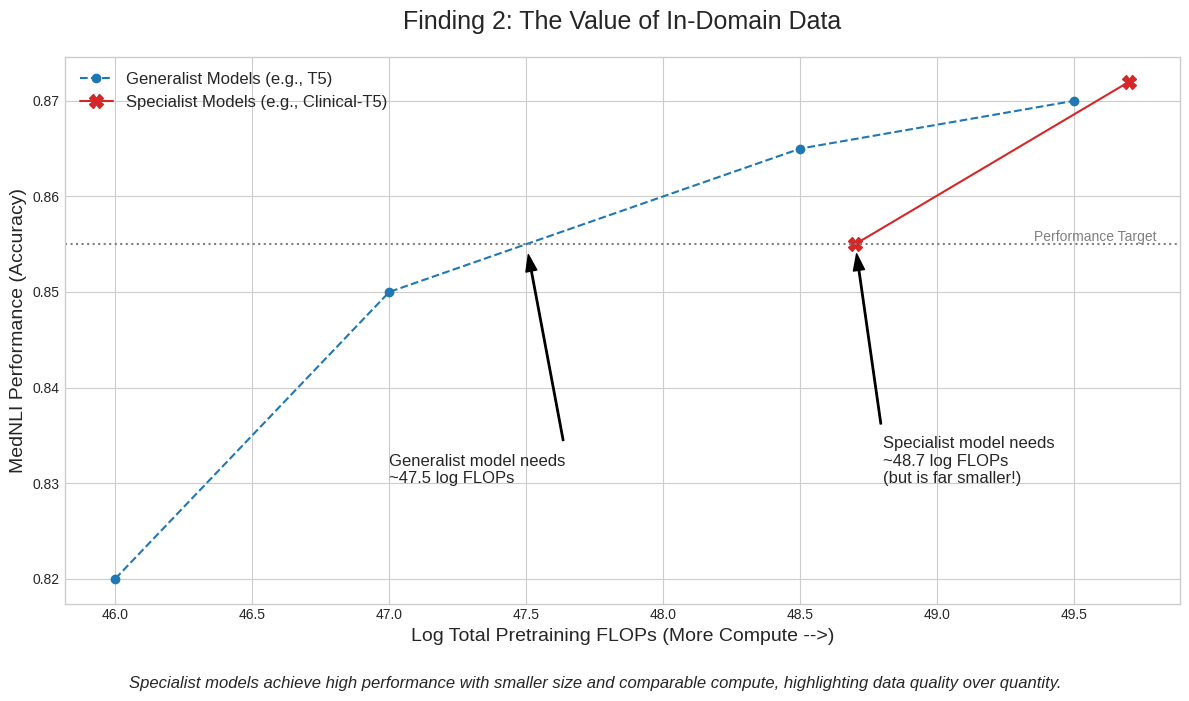

In [4]:
# Conceptual recreation of Figure 3 from the paper
# Log Total FLOPs vs Performance for MedNLI

# Data points are conceptual, based on the paper's findings
non_clinical_flops = np.array([46, 47, 48.5, 49.5])
non_clinical_perf = np.array([0.82, 0.85, 0.865, 0.87])

clinical_flops = np.array([48.7, 49.7])
clinical_perf = np.array([0.855, 0.872])

plt.figure(figsize=(12, 7))
plt.style.use('seaborn-v0_8-whitegrid')

plt.plot(non_clinical_flops, non_clinical_perf, color='#1f77b4', marker='o', linestyle='--', label='Generalist Models (e.g., T5)')
plt.plot(clinical_flops, clinical_perf, color='#d62728', marker='X', markersize=10, linestyle='-', label='Specialist Models (e.g., Clinical-T5)')

plt.title('Finding 2: The Value of In-Domain Data', fontsize=18, pad=20)
plt.xlabel('Log Total Pretraining FLOPs (More Compute -->)', fontsize=14)
plt.ylabel('MedNLI Performance (Accuracy)', fontsize=14)
plt.legend(fontsize=12)

# Annotation for a specific performance level
perf_level = 0.855
plt.axhline(y=perf_level, color='grey', linestyle=':', label=f'{perf_level*100:.1f}% Accuracy Target')
plt.text(49.8, perf_level, 'Performance Target', ha='right', va='bottom', color='grey')

plt.annotate('Generalist model needs\n~47.5 log FLOPs', xy=(47.5, perf_level), xytext=(47, 0.83),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize=12)

plt.annotate('Specialist model needs\n~48.7 log FLOPs\n(but is far smaller!)', xy=(48.7, perf_level), xytext=(48.8, 0.83),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize=12)

plt.figtext(0.5, 0.01, 'Specialist models achieve high performance with smaller size and comparable compute, highlighting data quality over quantity.',
            ha='center', fontsize=12, style='italic')
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

### Finding 3: For Clinical Tasks, Finetuning Trounces In-Context Learning

This is the paper's most direct challenge to the "bigger is always better" philosophy. They simulated a common real-world scenario: you only have a small amount of labeled data for your specific task.

The result was unambiguous: **even with only 1% of the training data, finetuning a specialized model significantly outperformed prompting a massive generalist model like GPT-3.**

> **Why?** In-Context Learning (ICL) is like cramming for an exam with a few flashcards. It's good for surface-level pattern matching. Finetuning is like attending the whole course—it fundamentally changes the model's weights and teaches it the deep, underlying structure of the data. For the complex, semi-structured grammar of clinical notes, cramming isn't enough. You need to do the homework.

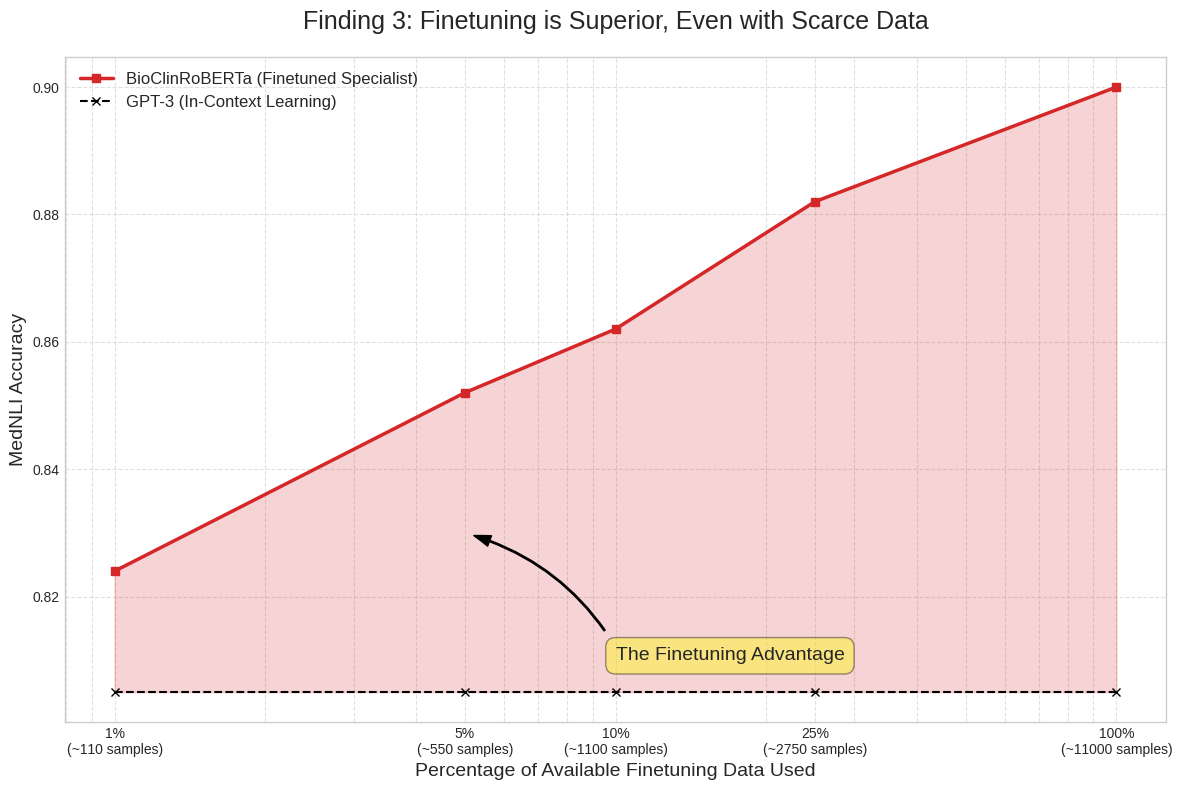

In [6]:
# Recreating the ablation study from Figure 4 of the paper
training_data_pct = [1, 5, 10, 25, 100]

# Performance data reflecting the trends in the paper for the MedNLI task
# These are realistic interpolations based on the paper's tables and figures.
bioclin_roberta_perf = [0.824, 0.852, 0.862, 0.882, 0.900]
gpt3_icl_perf = [0.805] * 5 # ICL performance is constant
flan_t5_icl_perf = [0.808] * 5 # ICL performance is constant

plt.figure(figsize=(12, 8))

plt.plot(training_data_pct, bioclin_roberta_perf, marker='s', linestyle='-', label='BioClinRoBERTa (Finetuned Specialist)', color='#d62728', lw=2.5)
plt.plot(training_data_pct, gpt3_icl_perf, marker='x', linestyle='--', color='black', label='GPT-3 (In-Context Learning)')

plt.title('Finding 3: Finetuning is Superior, Even with Scarce Data', fontsize=18, pad=20)
plt.xlabel('Percentage of Available Finetuning Data Used', fontsize=14)
plt.ylabel('MedNLI Accuracy', fontsize=14)
plt.xscale('log')
plt.xticks(training_data_pct, [f'{p}%\n(~{p*110} samples)' for p in training_data_pct])
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

plt.fill_between(training_data_pct, gpt3_icl_perf, bioclin_roberta_perf, color='#d62728', alpha=0.2,
                 label='Performance Advantage of Finetuning')

plt.annotate('The Finetuning Advantage',
             xy=(5, 0.83), xytext=(10, 0.81),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8, connectionstyle="arc3,rad=0.2"),
             fontsize=14, bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.4))

plt.tight_layout()
plt.show()

---
## Final Verdict: A Symbiotic Future

So, do we still need clinical language models? **The answer from the research and lecture is a clear and resounding YES.**

However, this does not diminish the power of generalist models. The future is not a competition, but a collaboration. We are heading towards a symbiotic ecosystem where each type of model plays to its strengths:

1.  **Generalist Giants (like Med-PaLM)** will serve as powerful, conversational interfaces. They excel at tasks requiring broad world knowledge, complex reasoning, and patient-facing communication. They are the friendly, knowledgeable "front door" to medical AI.

2.  **Specialized Experts (like Clinical-T5)** will be the workhorses of clinical data processing. They are the efficient, highly accurate engines for extracting structured information from messy EHRs, powering analytics, and enabling deep clinical research. They are the surgical tools for high-precision tasks.

The ultimate vision is a powerful synergy: a generalist model might interact with a doctor to understand a query, then call upon a suite of specialized models to parse the patient's records, and finally synthesize the findings into a coherent, safe, and helpful response. This collaborative approach will unlock the full potential of AI to revolutionize medicine.